In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
dataset1 = pd.read_csv('EXP1.csv')
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [51]:
dataset1.head()

,INPUT,OUTPUT
0,0,20
1,2,40
2,4,60
3,6,80
4,8,100


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [55]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [57]:
# Name: RUSHMITHA R
# Register Number: 212224040281
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)

        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x






In [58]:
# Initialize the Model, Loss Function, and Optimizer
# Write your code here
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)


In [59]:
# Name: RUSHMTIHA  R
# Register Number: 212224040281
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss=criterion(ai_brain(X_train),y_train)
        loss.backward()
        optimizer.step()


        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [60]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 24127.763672
Epoch [200/2000], Loss: 22745.623047
Epoch [400/2000], Loss: 20189.689453
Epoch [600/2000], Loss: 16494.017578
Epoch [800/2000], Loss: 12012.337891
Epoch [1000/2000], Loss: 7423.006836
Epoch [1200/2000], Loss: 3668.240967
Epoch [1400/2000], Loss: 1620.358643
Epoch [1600/2000], Loss: 1127.848755
Epoch [1800/2000], Loss: 927.507507


In [61]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 2375.818848


In [62]:
loss_df = pd.DataFrame(ai_brain.history)

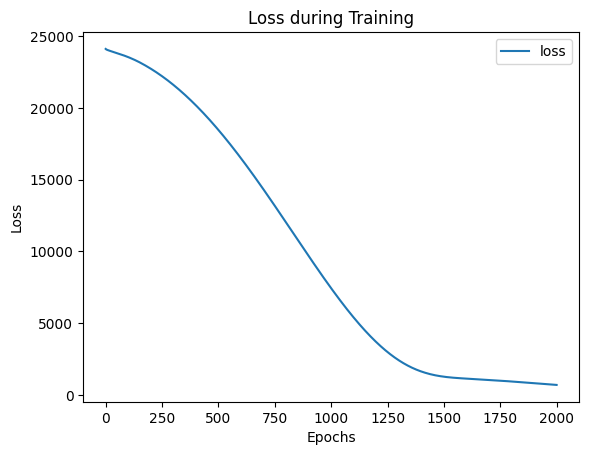

In [63]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [64]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 996.1139526367188
